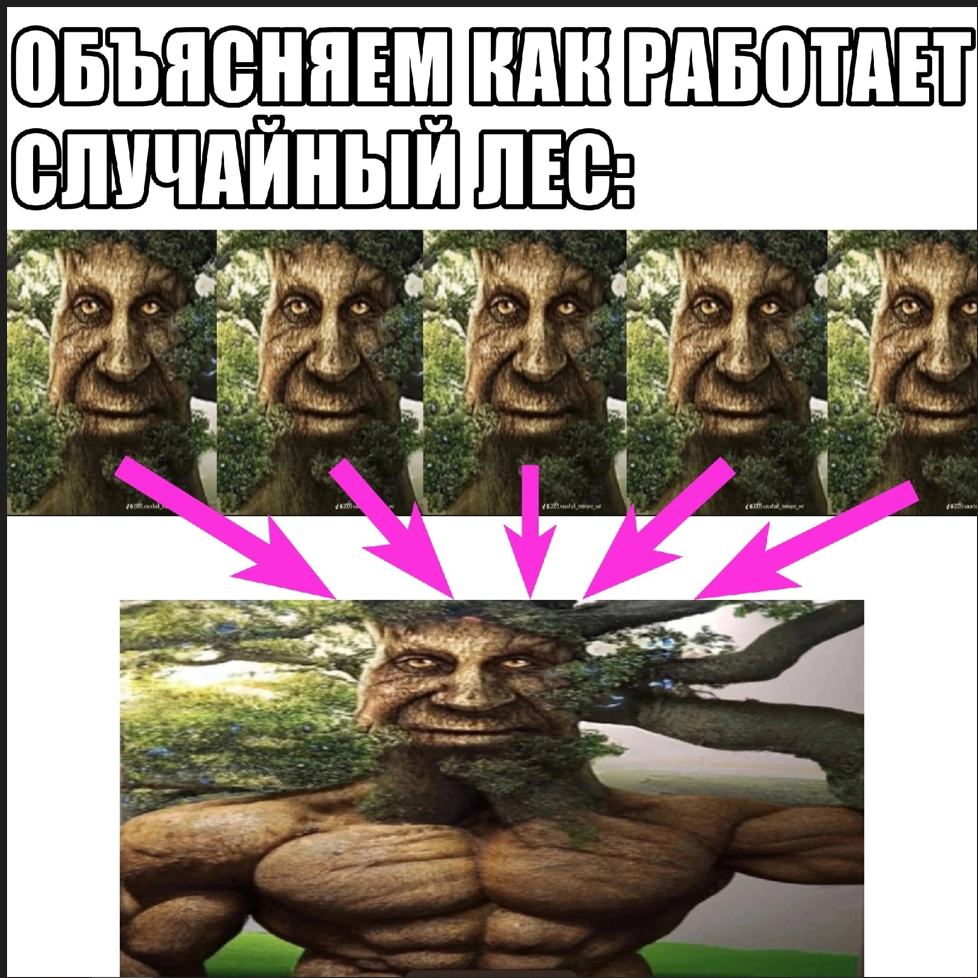

In [373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import sklearn.metrics as metric
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier

# Задание 1

## Decision Tree Classification¶

In [374]:
dataC=pd.read_csv('../data/smoke_detector_task.csv')
dataC.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,No
1,1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,No
2,2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,No
3,3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,No
4,4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,No


Предобработаем датасет: 

In [375]:
dataC=dataC.drop(['Unnamed: 0'],axis=1)

In [376]:
dataC=dataC.dropna()

In [377]:
dict1 = {'Yes': '1', 'No': '0'}

dataC['Fire Alarm'] = dataC['Fire Alarm'].map(dict1)
dataC['Fire Alarm']=dataC['Fire Alarm'].astype(int)

In [378]:
data.head()

,Year,Distance,Engine_capacity,Price
0,2011.0,195000.0,1800.0,7750.0
1,2014.0,135000.0,1500.0,8550.0
2,1998.0,1.0,1400.0,2200.0
3,2012.0,110000.0,1500.0,6550.0
4,2006.0,200000.0,1600.0,4100.0


Приступим к обучению:

In [379]:
X = dataC.drop(['Fire Alarm'], axis=1)
y= dataC['Fire Alarm']

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [381]:
parameters = {'max_depth': np.arange(1, 10, 1)}
optimal = RandomizedSearchCV(DecisionTreeClassifier(), parameters).fit(X_train, y_train)
optimal.best_params_['max_depth']

7

In [382]:
TreeCls = DecisionTreeClassifier(max_depth=optimal.best_params_['max_depth'])

In [383]:
TreeCls.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [384]:
y_pred_cls = TreeCls.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_cls)))

Model accuracy score: 0.9998


In [385]:
print('Training score: {:.4f}'.format(TreeCls.score(X_train, y_train)))
print('Test score: {:.4f}'.format(TreeCls.score(X_test, y_test)))

Training score: 1.0000
Test score: 0.9998


[Text(0.5489130434782609, 0.9375, 'x[13] <= 5743.5\ngini = 0.408\nsamples = 48482\nvalue = [13848, 34634]'),
 Text(0.5054347826086957, 0.8125, 'x[5] <= 13204.5\ngini = 0.383\nsamples = 18668\nvalue = [13848, 4820]'),
 Text(0.20652173913043478, 0.6875, 'x[7] <= 933.979\ngini = 0.208\nsamples = 13380\nvalue = [11802, 1578]'),
 Text(0.08695652173913043, 0.5625, 'x[13] <= 36.5\ngini = 0.048\nsamples = 779\nvalue = [19, 760]'),
 Text(0.043478260869565216, 0.4375, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.13043478260869565, 0.4375, 'gini = 0.0\nsamples = 760\nvalue = [0, 760]'),
 Text(0.32608695652173914, 0.5625, 'x[2] <= 57.445\ngini = 0.121\nsamples = 12601\nvalue = [11783, 818]'),
 Text(0.21739130434782608, 0.4375, 'x[13] <= 3320.5\ngini = 0.082\nsamples = 12251\nvalue = [11729, 522]'),
 Text(0.13043478260869565, 0.3125, 'x[13] <= 4.5\ngini = 0.001\nsamples = 9700\nvalue = [9697, 3]'),
 Text(0.08695652173913043, 0.1875, 'x[9] <= 2.3\ngini = 0.337\nsamples = 14\nvalue = [11, 3]

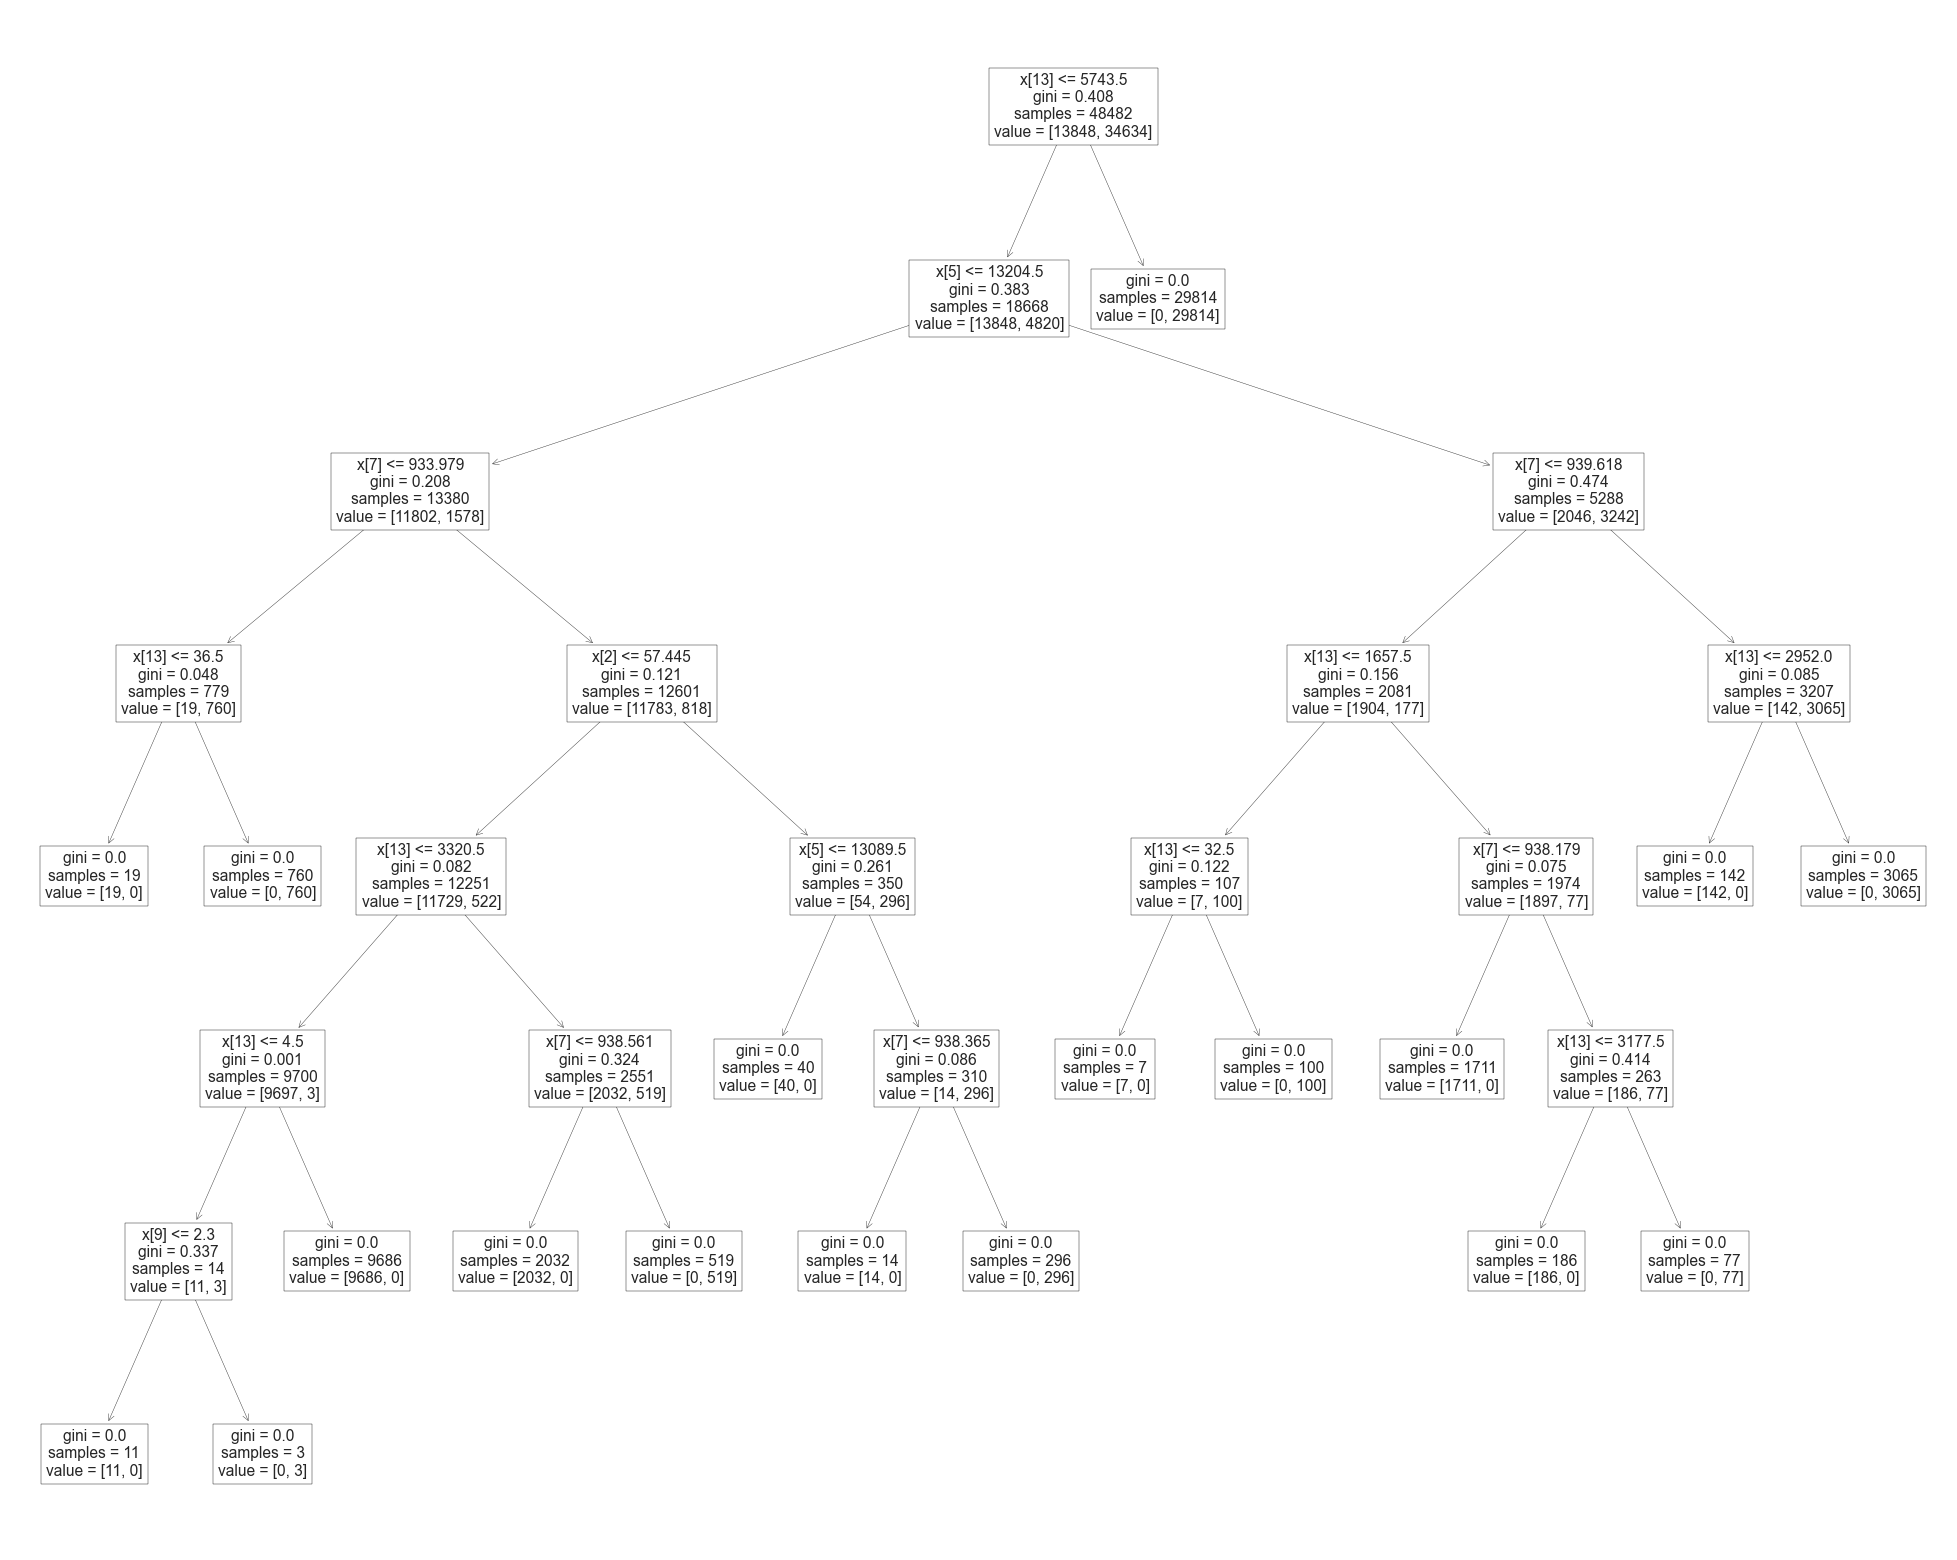

In [386]:
plt.figure(figsize=(25,20))
from sklearn import tree
tree.plot_tree(TreeCls.fit(X_train, y_train))

## Пикарет классификация:

In [387]:
from pycaret.classification import *

In [388]:
setup(data=dataC,  target='Fire Alarm', session_id=555, train_size=0.7, preprocess=True)

,Description,Value
0,Session id,555
1,Target,Fire Alarm
2,Target type,Binary
3,Original data shape,"(60603, 15)"
4,Transformed data shape,"(60603, 15)"
5,Transformed train set shape,"(42422, 15)"
6,Transformed test set shape,"(18181, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [389]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [390]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9998,0.9998,0.9997,1.0000,0.9998,0.9994,0.9994
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9993,0.9990,0.9997,0.9993,0.9995,0.9983,0.9983
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9993,0.9995,0.9990,1.0000,0.9995,0.9983,0.9983
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


## Ансамбли:

In [391]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [392]:
BC = BaggingClassifier()
BC.fit(X_train, y_train)
y_pred_BagC = BC.predict(X_test)

In [393]:
Grad = GradientBoostingClassifier()
Grad.fit(X_train, y_train)
y_pred_GradC = Grad.predict(X_test)

In [394]:
estimators = [('rf', RandomForestClassifier())]

Stack = StackingClassifier(estimators=estimators, final_estimator=KNeighborsClassifier(n_neighbors=5))
Stack.fit(X_train, y_train)
y_pred_StackC = Stack.predict(X_test)

In [395]:
print('Bag  Accuracy = {}'.format(accuracy_score(y_test, y_pred_BagC)))
print('Grad Accuracy = {}'.format(accuracy_score(y_test, y_pred_GradC)))
print('Stack Accuracy = {}'.format(accuracy_score(y_test, y_pred_StackC)))

Bag  Accuracy = 0.9998349971124495
Grad Accuracy = 0.9999174985562247
Stack Accuracy = 1.0


## catboost, xgboost, lightgbm

In [396]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=2,learning_rate=0.5,depth=7)

model.fit(X_train, y_train)

y_pred_catC = model.predict(X_test)

print(classification_report(y_test, y_pred_catC))
confusion_matrix(y_test, y_pred_catC)

0:	learn: 0.3202629	total: 27.1ms	remaining: 27.1ms
1:	learn: 0.1758265	total: 41.5ms	remaining: 0us
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3462
           1       1.00      1.00      1.00      8659

    accuracy                           1.00     12121
   macro avg       1.00      0.99      1.00     12121
weighted avg       1.00      1.00      1.00     12121



array([[3428,   34],
       [   4, 8655]], dtype=int64)

In [397]:
print(classification_report(y_test, y_pred_catC))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3462
           1       1.00      1.00      1.00      8659

    accuracy                           1.00     12121
   macro avg       1.00      0.99      1.00     12121
weighted avg       1.00      1.00      1.00     12121



In [398]:
from xgboost import XGBClassifier


XGB_classifier = XGBClassifier(eta=0.1, max_depth=6)
XGB_classifier.fit(X_train.to_numpy(), y_train.to_numpy())

y_pred_xgbC = XGB_classifier.predict(X_test)
confusion_matrix(y_test, y_pred_xgbC )

array([[3460,    2],
       [   0, 8659]], dtype=int64)

In [399]:
print(classification_report(y_test, y_pred_xgbC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3462
           1       1.00      1.00      1.00      8659

    accuracy                           1.00     12121
   macro avg       1.00      1.00      1.00     12121
weighted avg       1.00      1.00      1.00     12121



In [400]:
from lightgbm import LGBMClassifier

lbm = LGBMClassifier(force_row_wise=True)
lbm.fit(X_train.to_numpy(), y_train.to_numpy())

y_pred_lbm = lbm.predict(X_test)
confusion_matrix(y_test, y_pred_lbm )

[LightGBM] [Info] Number of positive: 34634, number of negative: 13848
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 48482, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.714368 -> initscore=0.916695
[LightGBM] [Info] Start training from score 0.916695


array([[3462,    0],
       [   2, 8657]], dtype=int64)

In [401]:
print(classification_report(y_test, y_pred_lbm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3462
           1       1.00      1.00      1.00      8659

    accuracy                           1.00     12121
   macro avg       1.00      1.00      1.00     12121
weighted avg       1.00      1.00      1.00     12121



## Перейдём к дереву регрессий

In [402]:
data=pd.read_csv('../data/moldova_cars_task.csv')

Предобработаем :

In [403]:
data=data.dropna()

In [404]:
data=data.drop_duplicates()

In [405]:
data=data.rename(
    columns={
        'Engine_capacity(cm3)':'Engine_capacity',
        'Price(euro)':'Price'
    }
)

In [406]:
data=pd.get_dummies(data)

In [407]:
outlier = data[['Year','Distance','Engine_capacity','Price']]
outlier
Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)

IQR=Q3-Q1
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data=data_filtered

In [408]:
yreg = data["Price"]
Xreg = data.drop(["Price"], axis=1)

In [409]:
Xreg_train, Xreg_test, yreg_train, yreg_test = train_test_split(Xreg, yreg,random_state=999, test_size=0.2)

In [410]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'max_depth': np.arange(1, 10, 1)}

reg_optimal = RandomizedSearchCV(DecisionTreeRegressor(), parameters).fit(Xreg_train, yreg_train)
reg_optimal.best_params_

{'max_depth': 7}

In [411]:
reg = DecisionTreeRegressor(max_depth=reg_optimal.best_params_['max_depth'])
reg.fit(Xreg_train, yreg_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')

In [412]:
print('Training set score: {:.4f}'.format(reg.score(Xreg_train, yreg_train)))
print('Test set score: {:.4f}'.format(reg.score(Xreg_test, yreg_test)))

Training set score: 0.7840
Test set score: 0.7661


[Text(0.5, 0.9375, 'x[0] <= 2011.5\nsquared_error = 27610994.662\nsamples = 23502\nvalue = 7359.863'),
 Text(0.25, 0.8125, 'x[0] <= 2006.5\nsquared_error = 9565130.128\nsamples = 14917\nvalue = 4678.084'),
 Text(0.125, 0.6875, 'x[0] <= 2000.5\nsquared_error = 5566811.831\nsamples = 8494\nvalue = 3359.629'),
 Text(0.0625, 0.5625, 'x[2] <= 2052.5\nsquared_error = 6037555.282\nsamples = 3311\nvalue = 2404.682'),
 Text(0.03125, 0.4375, 'x[0] <= 1991.5\nsquared_error = 5967154.351\nsamples = 2801\nvalue = 2239.614'),
 Text(0.015625, 0.3125, 'x[1] <= 230050.0\nsquared_error = 16265891.252\nsamples = 360\nvalue = 2637.169'),
 Text(0.0078125, 0.1875, 'x[1] <= 227500.0\nsquared_error = 20598520.48\nsamples = 232\nvalue = 3012.875'),
 Text(0.00390625, 0.0625, 'squared_error = 19676555.172\nsamples = 228\nvalue = 2930.206'),
 Text(0.01171875, 0.0625, 'squared_error = 50556875.0\nsamples = 4\nvalue = 7725.0'),
 Text(0.0234375, 0.1875, 'x[2] <= 1850.0\nsquared_error = 7693442.818\nsamples = 128\nva

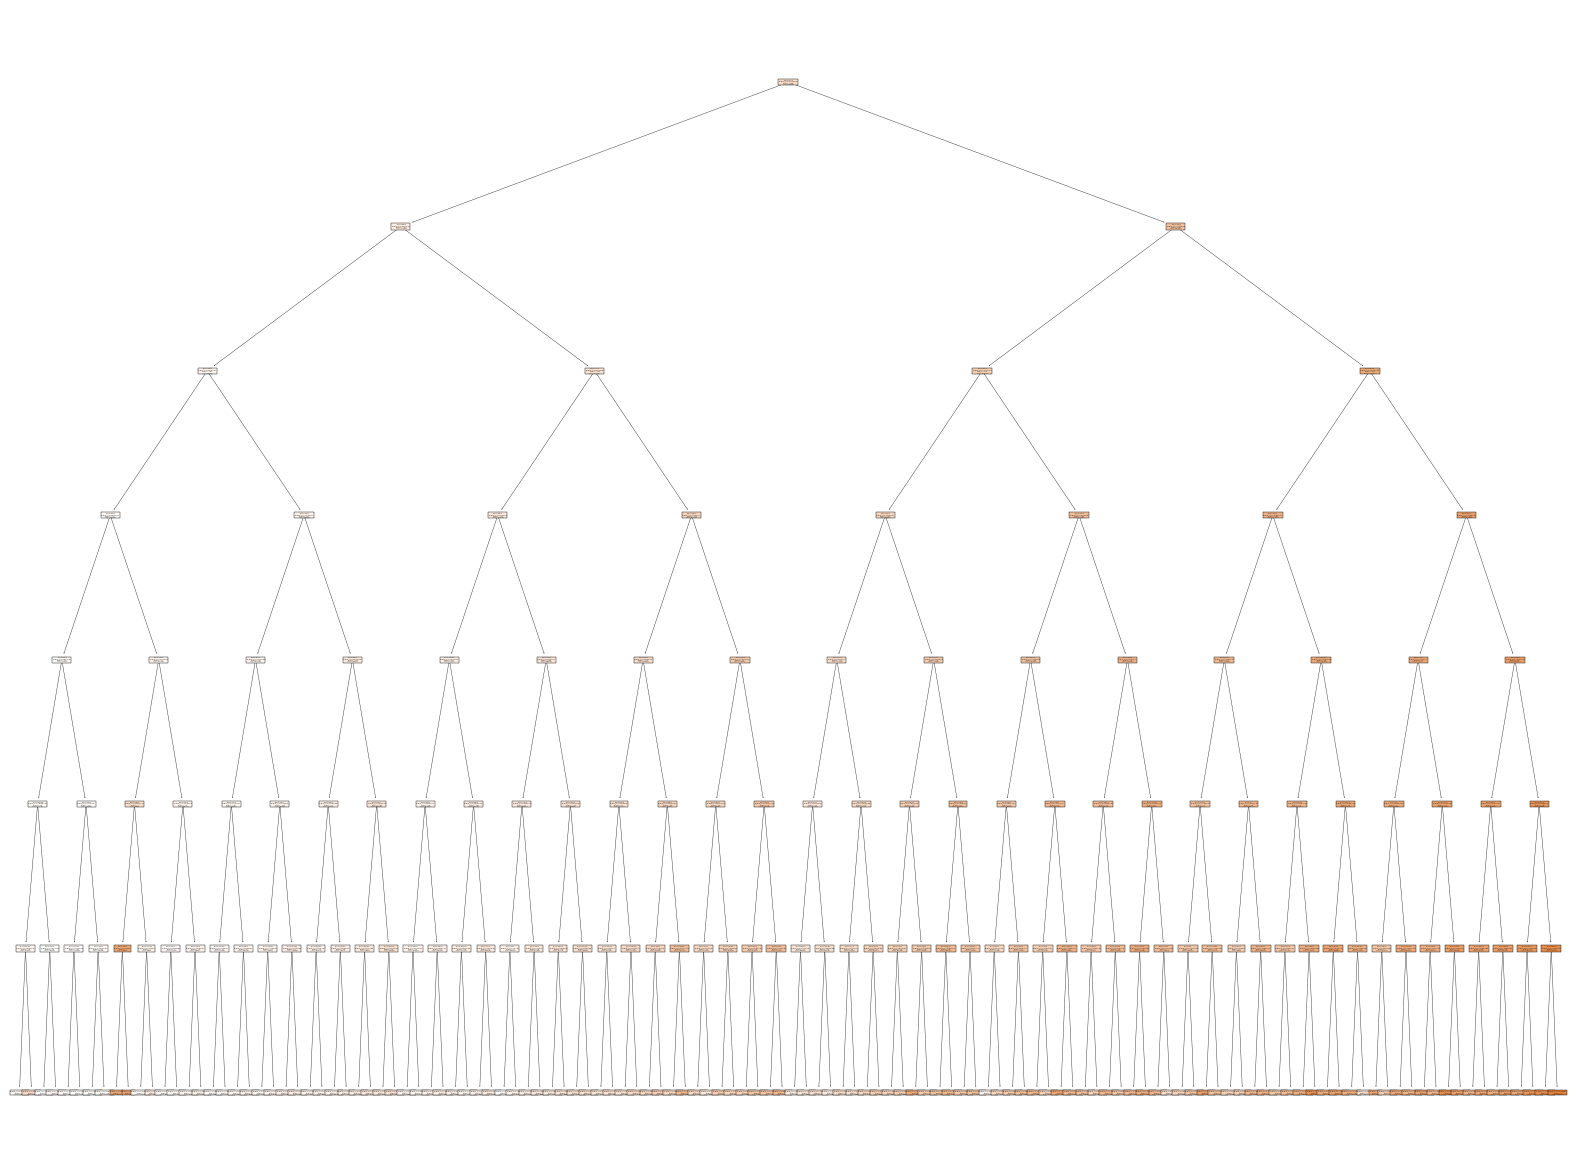

In [413]:
fig = plt.figure(figsize=(20,15))
DT_plot =tree.plot_tree(reg, filled=True)
DT_plot

## Пикарет регрессия:

In [414]:
from pycaret.regression import *

In [415]:
data=pd.read_csv('../data/moldova_cars_task.csv')
data.dropna()
setup(data=data,  target='Price(euro)', session_id=555, train_size=0.7, preprocess=True)

,Description,Value
0,Session id,555
1,Target,Price(euro)
2,Target type,Regression
3,Original data shape,"(41007, 9)"
4,Transformed data shape,"(41007, 25)"
5,Transformed train set shape,"(28704, 25)"
6,Transformed test set shape,"(12303, 25)"
7,Ordinal features,1
8,Numeric features,3
9,Categorical features,5


In [416]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [417]:
dt_reg = create_model(estimator='dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2324.2621,41623495.7262,6451.6274,0.6447,0.5785,0.3974
1,2148.3588,24895164.3164,4989.5054,0.6751,0.5576,0.4693
2,2224.4600,43421593.5766,6589.5063,0.6149,0.5706,0.4608
3,2264.2950,36801336.0626,6066.4105,0.6246,0.5543,1.1191
4,2168.8842,34819579.7559,5900.8118,0.6127,0.5525,0.4618
5,2191.0796,30704934.4322,5541.2033,0.6928,0.5513,0.4673
6,2180.2924,31713051.1217,5631.4342,0.6943,0.5829,0.4779
7,2227.0470,29527652.2373,5433.9352,0.6876,0.5487,0.4471
8,2348.6637,105921027.1239,10291.7942,-0.0958,0.5420,0.4808


In [418]:
tuned_dt_reg = tune_model(dt_reg)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2270.0274,31390951.5325,5602.7628,0.7321,0.4551,0.3707
1,2161.6863,28765620.8795,5363.3591,0.6246,0.4787,0.4033
2,2198.0850,38714953.5576,6222.1342,0.6566,0.4824,0.4118
3,2102.4687,23669549.5645,4865.1361,0.7585,0.4714,1.1138
4,2093.0959,20519054.6125,4529.7963,0.7718,0.4569,0.3907
5,2098.4571,24672182.5165,4967.1101,0.7531,0.4833,0.4247
6,2128.9238,20105351.2422,4483.8991,0.8062,0.4976,0.4506
7,2064.9999,20237964.2138,4498.6625,0.7859,0.4509,0.3692
8,2139.7877,23731201.5587,4871.4681,0.7545,0.4850,0.5794


Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Ансамбли:

In [419]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [420]:
BC = BaggingRegressor()
BC.fit(Xreg_train, yreg_train)
y_pred_Bag = BC.predict(Xreg_test)

In [421]:
Grad = GradientBoostingRegressor()
Grad.fit(Xreg_train, yreg_train)
y_pred_Grad = Grad.predict(Xreg_test)

In [422]:
estimators = [('lr', Ridge())]

Stack = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
Stack.fit(Xreg_train, yreg_train)
y_pred_Stack = Stack.predict(Xreg_test)

In [423]:
print('Bag  Accuracy = {}'.format(BC.score(Xreg_test, yreg_test)))
print('Grad Accuracy = {}'.format(Grad.score(Xreg_test, yreg_test)))
print('Stack Accuracy = {}'.format(Stack.score(Xreg_test, yreg_test)))

Bag  Accuracy = 0.7225755054003142
Grad Accuracy = 0.7729329742250306
Stack Accuracy = 0.6111732290618865


## catboost, xgboost, lightgbm

In [424]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(iterations=2,
                          learning_rate=0.5,
                          depth=10)

cat.fit(Xreg_train, yreg_train)

y_pred_catC = cat.predict(Xreg_test)

0:	learn: 3503.7714700	total: 22.7ms	remaining: 22.7ms
1:	learn: 2837.3114514	total: 42ms	remaining: 0us


In [425]:
from xgboost import XGBRegressor

XGB_regressor = XGBRegressor(eta=0.1, max_depth=6)
XGB_regressor.fit(Xreg_train, yreg_train)

y_pred_xgbC = XGB_regressor.predict(Xreg_test)

In [426]:
from lightgbm import LGBMRegressor

lbm = LGBMRegressor(force_row_wise=True)
lbm.fit(Xreg_train.to_numpy(), yreg_train.to_numpy())

y_pred_lbmC = lbm.predict(Xreg_test)

[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 23502, number of used features: 3
[LightGBM] [Info] Start training from score 7359.863033


In [427]:
print(cat.score(Xreg_test, yreg_test))
print(XGB_regressor.score(Xreg_test, yreg_test))
print(lbm.score(Xreg_test, yreg_test))

0.7006624142293991
0.7796526686358228
0.7797558566948541


# CART

In [428]:
class Node:
    def __init__(self, depth):
        self.value = None  
        self.left = None   
        self.right = None  
        self.depth = depth  

class CART:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def fit(self, X, y):
        self.root = self._build_tree(X, y, depth=0)

    def predict(self, X):
        return np.array([self._predict_tree(x, self.root) for x in X])

    def _build_tree(self, X, y, depth):
        if (self.max_depth is not None and depth >= self.max_depth) or len(X) <= self.min_samples_split:
            # Если достигнута макс глубина или мин колво примеров,
            # делаем в ноду среднее  переменной
            leaf = Node(depth)
            leaf.value = np.mean(y)
            return leaf

        # Ищем наилучшее разделение
        split_feature, split_threshold, split_indices = self._find_best_split(X, y)

        if split_feature is None:
            # Если нет разделения то листовой узел
            leaf = Node(depth)
            leaf.value = np.mean(y)
            return leaf

        # данные по  разделению
        left_X, left_y = X[split_indices], y[split_indices]
        right_X, right_y = X[~split_indices], y[~split_indices]

        # Рекурсивно строим левое и правое поддерево
        node = Node(depth)
        node.value = (np.mean(left_y) + np.mean(right_y)) / 2.0 
        node.left = self._build_tree(left_X, left_y, depth + 1)
        node.right = self._build_tree(right_X, right_y, depth + 1)

        return node

    def _find_best_split(self, X, y):
        best_feature = None
        best_threshold = None
        best_indices = None
        best_mse = float('inf')

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                # Делим  по  порогу
                split_indices = X[:, feature] <= threshold

                mse = self._calculate_mse(y, split_indices)

                # Если  разделение обновляем
                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = threshold
                    best_indices = split_indices

        return best_feature, best_threshold, best_indices

    def _calculate_mse(self, y, split_indices):
        left_y = y[split_indices]
        right_y = y[~split_indices]

        mse = np.mean((left_y - np.mean(left_y))**2) + np.mean((right_y - np.mean(right_y))**2)
        return mse

    def _predict_tree(self, x, node):
        if node.value is not None:
            # Если лист возвращаем значение
            return node.value
        elif x[node.feature] <= node.threshold:
            # Если значение признака меньше или равно порогу то влево
            return self._predict_tree(x, node.left)
        else:
            # Иначе предсказываем в право
            return self._predict_tree(x, node.right)

In [429]:
data=dataC
Xc = np.array(data.drop(["Fire Alarm"], axis=1))[:1000]
yc= np.array(data['Fire Alarm'])[:1000]

In [430]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2)

In [431]:
from sklearn.metrics import accuracy_score, mean_squared_error
cartClassifier = CART( max_depth=6, min_samples_split=5)

cartClassifier.fit(Xc_train, yc_train) 

y_pred_classifier = cartClassifier.predict(Xc_test)

accuracy = accuracy_score(yc_test, y_pred_classifier)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0
